Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


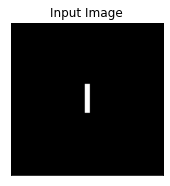

In [8]:
img = cv2.imread('DataFreq/Fig0424(a)(rectangle).tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

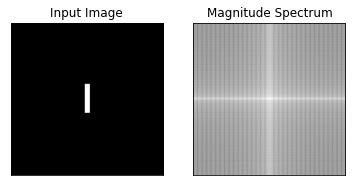

In [9]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#mostrando a imagem de entrada
#cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#mostrando a magnitude da TF
#cv2_imshow(magnitude_spectrum)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


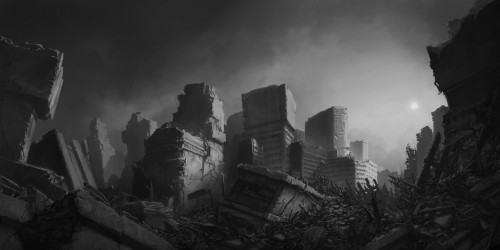

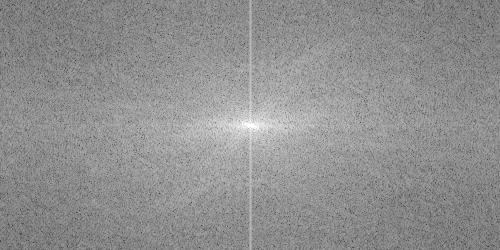

In [13]:
img = cv2.imread('DataFreq/t1.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(dft) #aplica FFT e posteriormente a desloca - dica é usar a função presente na numpy
magnitude_spectrum = 20*np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1])) # cria o espectro de magnitude 


#caso use o colab, utilize o patch corretamente
cv2_imshow(img) 
cv2_imshow(magnitude_spectrum)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [16]:
def normalize(img):
  lmin = float(img.min())
  lmax = float(img.max())

  return np.floor((img-lmin)/(lmax-lmin)*255.0)

In [14]:
#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)
raio = 100 #valor inteiro que irá cortar mais ou menos frequências
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x-center[0]) ** 2 + (y-center[1]) ** 2 <= raio * raio
mask[mask_area] = 1   # filtragem circular - preencher com o valor complementar a zero para que na multiplicação seja mantido o valor

53414


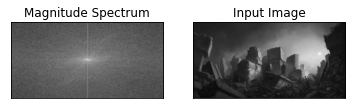

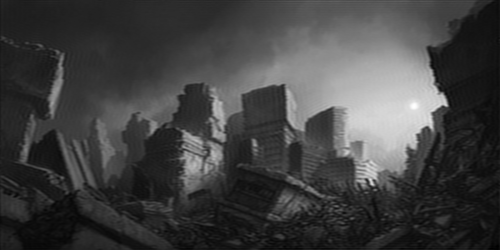

In [18]:
# apply mask and inverse DFT
fshift = fft_shift * mask  # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift) # aplicar a FFT inversa - a dica é usar a presente na lib Numpy
img_back = cv2.idft(f_ishift) # aplicar a DFT - a dica é usar a presente na OpenCV
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])  # calcular a magnitude após a DFT

img_back = np.array(img_back, dtype=np.float32)
print(np.argmax(img_back))
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

# usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
cv2_imshow(filtered_img)

In [19]:
#criação da filtro PA - segue-se o principio do PB, porém inverso
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols,2), np.uint8)
raio = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x-center[0]) ** 2 + (y-center[1]) ** 2 <= raio * raio
mask[mask_area] = 0

93364


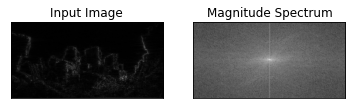

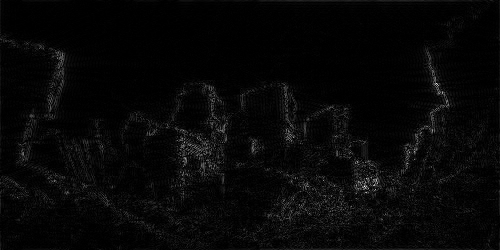

In [20]:
# apply mask and inverse DFT
fshift = fft_shift * mask # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift)  #inversa da fft
img_back = cv2.idft(f_ishift) #inversa da dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])  #recuperando a imagem capturando a magnitude (intesidade) 

img_back = np.array(img_back, dtype=np.float32)
print(np.argmax(img_back))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv - mesmo processo anterior
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
cv2_imshow(filtered_img)

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central


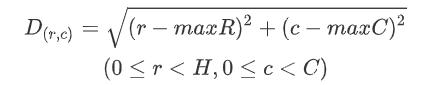


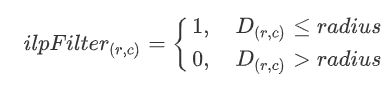


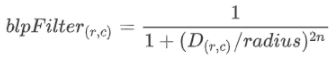


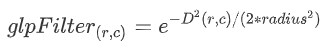

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma


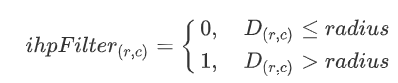

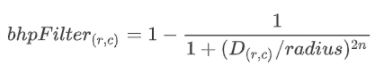


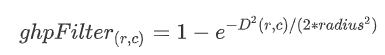

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma


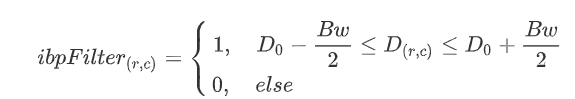


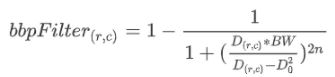


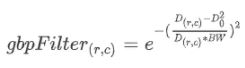

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma


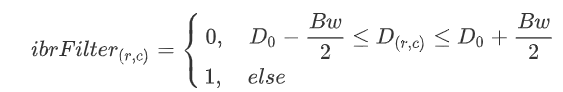


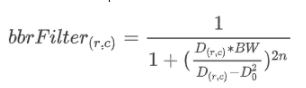

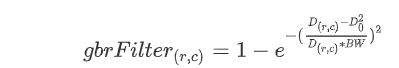

### Funções

In [21]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # ideal low-pass filter
        lpFilter = np.copy(d)
        lpFilter[lpFilter < pow(radius, 2.0)] = 1 #selecionar a região com 1
        lpFilter[lpFilter >= pow(radius, 2.0)] = 0 #selecionar a região com 0
    elif lpType == 1: #Butterworth low-pass filter 
        lpFilter = 1.0 / (1 + np.power(np.sqrt(d)/radius, 2*n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian low pass filter
        lpFilter = np.exp(-d/(2*pow(radius, 2.0))) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter  # atribuição para criação na primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix


def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal high pass filter
        lpFilter = np.copy(d)
        lpFilter[lpFilter < pow(radius, 2.0)] = 0 #selecionar a região com 0
        lpFilter[lpFilter >= pow(radius, 2.0)] = 1 #selecionar a região com 1
    elif lpType == 1: #Butterworth Highpass Filters 
        lpFilter = 1.0 - 1.0 / (1+np.power(np.sqrt(d)/radius, 2*n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian Highpass Filter 
        lpFilter = 1.0 - np.exp(-d/2*pow(radius, 2.0)) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter  # atribuição para criação na primeira camada
    lpFilter_matrix[:, : ,1] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(c, 2.0) + np.power(r, 2.0)) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal bandpass filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 1 # valor da região de passagem
        lpFilter[lpFilter > (bandCenter + bandWidth / 2)] = 0 # selecionar e atribuir valor da região de rejeição superior
        lpFilter[lpFilter < (bandCenter - bandWidth / 2)] = 0 # selecionar e atribuir valor da região de rejeição inferior
    elif lpType == 1: #Butterworth bandpass filter
        lpFilter = 1.0 - 1.0 / (1 + np.power(d * bandWidth / (abs(pow(d, 2) - pow(bandCenter, 2)) + 1), 2 * n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian bandpass filter
        lpFilter = np.exp(- pow((pow(d, 2) - pow(bandCenter, 2)) / ((d * bandWidth) + 1), 2)) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter # atribuição para criação na primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix


def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(c, 2.0) + np.power(r, 2.0)) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal band stop filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 0 # valor da região de rejeição
        lpFilter[lpFilter > (bandCenter + bandWidth / 2)] = 1 # valor da região de passagem superior
        lpFilter[lpFilter < (bandCenter + bandWidth / 2)] = 1 # valor da região de inferior
    elif lpType == 1: #Butterworth band stop filter
        lpFilter = 1.0 / (1 + np.power(d * bandWidth / (abs(pow(d, 2) - pow(bandCenter, 2)) + 1), 2 * n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian band stop filter
        lpFilter = 1.0 - np.exp(- pow((pow(d, 2) - pow(bandCenter, 2)) / ((d * bandWidth) + 1), 2)) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter # atribuição para criação na primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix

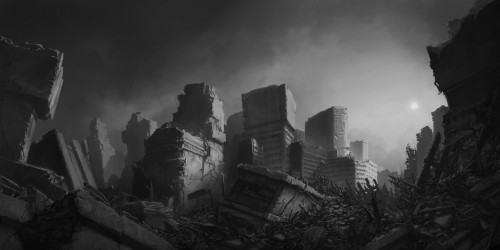

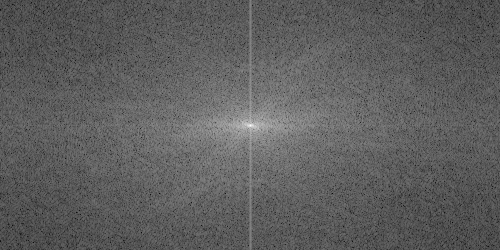

In [24]:
img = cv2.imread('DataFreq/t1.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT) #aplicar DFT - a dica é cv2.dft()
fft_shift = np.fft.fftshift(dft) #aplicar FFT e deslocamento da FFT
magnitude_spectrum = 20*np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1])) # aplicar o calculo de spectro de magnitude - 20*log() e cv2. magnitude() utilizando DFT

cv2_imshow(img)

#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
magnitude_spectrum = normalize(magnitude_spectrum)

cv2_imshow(magnitude_spectrum)

In [25]:
nrows, ncols = fft_shift.shape[0], fft_shift.shape[1] # pegar o tamanho da imagem np.shape da imagem no domínio da frequência - cuidado com a camada usada
real = np.power(fft_shift[:, :, 0], 2.0) # pegar o valor real - np.power na primeira camada
imaginary = np.power(fft_shift[:, :, 1], 2.0) # pegar o valor real - np.power na segunda camada
amplitude = np.sqrt(real+imaginary) # aplica a raiz quadrada entre as duas componetes do número complexo- np.sqrt()
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude) # extrais os valores extremos e posições usando o valor gerado na amplitude - cv2.minMaxLoc()

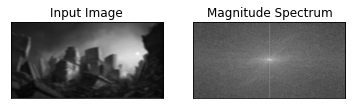

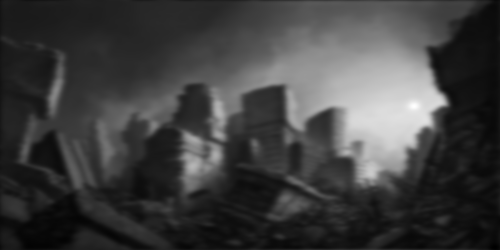

In [26]:
maskPB = createPB(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=2)
maskPA = createPA(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)
maskPF = createPF(shape=fft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)
maskRF = createRF(shape=fft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

filtered_freq = fft_shift * maskPB #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift) #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) 
#recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude

img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
#filtered_img -= ?
#filtered_img = ?
#filtered_img = ?

#plotando com a OpenCV
cv2_imshow(filtered_img)

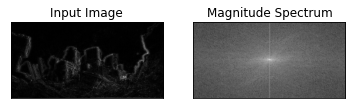

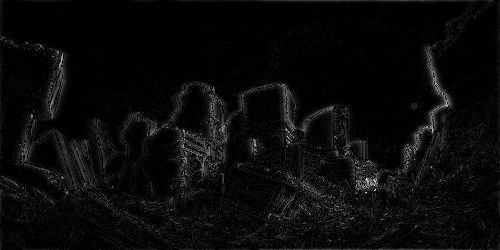

In [27]:
filtered_freq = fft_shift * maskPA #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift) #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) 
#recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude

img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
#filtered_img -= ?
#filtered_img = ?
#filtered_img = ?
#
#plotando com a OpenCV
cv2_imshow(filtered_img)

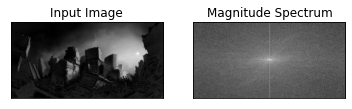

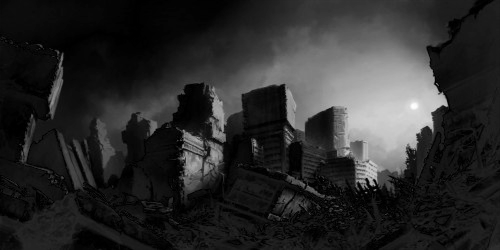

In [28]:
filtered_freq = fft_shift * maskPF #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift) #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) 
#recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude

img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
#filtered_img -= ?
#filtered_img = ?
#filtered_img = ?
#
#plotando com a OpenCV
cv2_imshow(filtered_img)

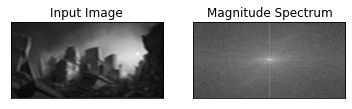

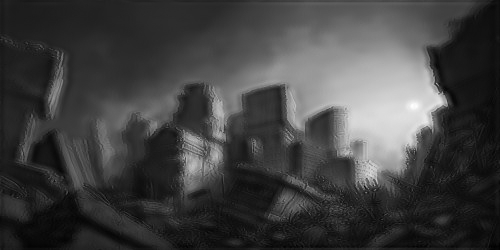

In [29]:
filtered_freq = fft_shift * maskRF #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift) #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) 
#recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude

img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
#'''
# Pode-se seguir as dicas a seguir para implementar essa normalização
#    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
#    - Subtrair os valores dos pixels do valor do menor pixel - .min
#    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
#    - fazer um cast para 8 bits pela própria Numpy - astype()
#'''
filtered_img = normalize(img_back)
#filtered_img -= ?
#filtered_img = ?
#filtered_img = ?
#
#plotando com a OpenCV
cv2_imshow(filtered_img)